In [1]:
import pandas as pd
df=pd.read_csv("airtel_tweets.csv")
df1=pd.read_csv("mtn_tweets.csv")

C:\Users\LCT\AppData\Local\Temp\ipykernel_13948\3007764954.py:2: DtypeWarning: Columns (39,48,50,54,59,64,69,71,84,89,91,95,97,98,102,106,111,114,135,136,137,138,139,160,161,163,165,166,168,170,171,210,212,216,217,218,220,221,222,468,472,473,474,476,477,478,598,705,833,837,838,839,841,842,843,1091,1095,1096,1097,1099,1100,1101,1223,1331,1490,1518,1519,1521,1522,1524,1526,1527,1528,1557,1558,1560,1561,1563,1565,1566,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1638,1640,1641,1645,1648,1649,1650,1652,1654,1655,1656,1657,1659,1785,1786,1788,1789,1791,1792,1794,1795,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1825,1827,1828,1831,1833,1834,1835,1837,1839,1840,1841,1842,1844,1971,1972,1974,1975,1977,1978,1980,1981) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("airtel_tweets.csv")
C:\Users\LCT\AppData\Local\Temp\ipykernel_13948\3007764954.py:3: DtypeWarning: Columns (44,47,50,53,56,59,60,61,319,320,322,323,325,3

In [6]:
# Convert 'createdAt' column to datetime
df['createdAt'] = pd.to_datetime(df['createdAt'])

# Define the date range
start_date = '2025-01-01'
end_date = '2025-02-01'

# Filter the DataFrame
filtered_df = df[(df['createdAt'] >= start_date) & (df['createdAt'] <= end_date)]

print(filtered_df)

    author/canDm  author/canMediaTag  \
24          True                True   
25          True                True   
26          True                True   
27          True                True   
28          True                True   
29          True                True   
30          True                True   
31          True                True   
32          True                True   
33          True                True   
34          True                True   
35          True                True   

                                  author/coverPicture  \
24  https://pbs.twimg.com/profile_banners/34208079...   
25  https://pbs.twimg.com/profile_banners/34208079...   
26  https://pbs.twimg.com/profile_banners/34208079...   
27  https://pbs.twimg.com/profile_banners/34208079...   
28  https://pbs.twimg.com/profile_banners/34208079...   
29  https://pbs.twimg.com/profile_banners/34208079...   
30  https://pbs.twimg.com/profile_banners/34208079...   
31  https://pbs.twimg.c

In [7]:
# Extract the URLs
urls = filtered_df['conversationId']

# Save the URLs to a text file
with open('conversationId.txt', 'w') as file:
    for url in urls:
        file.write(f"{url}\n")

# Confirm the file has been saved
print("URLs have been saved to 'twitter_urls.txt'.")

URLs have been saved to 'twitter_urls.txt'.


In [8]:
# Convert 'createdAt' column to datetime
df1['createdAt'] = pd.to_datetime(df1['createdAt'])

# Define the date range
start_date = '2025-01-01'
end_date = '2025-02-01'

# Filter the DataFrame
filtered_df1 = df1[(df1['createdAt'] >= start_date) & (df1['createdAt'] <= end_date)]

print(filtered_df1)

     author/canDm  author/canMediaTag  \
185          True                True   
186          True                True   
187          True                True   
188          True                True   
189          True                True   
..            ...                 ...   
241          True                True   
242          True                True   
243          True                True   
245          True                True   
246          True                True   

                                   author/coverPicture  \
185  https://pbs.twimg.com/profile_banners/69266428...   
186  https://pbs.twimg.com/profile_banners/69266428...   
187  https://pbs.twimg.com/profile_banners/69266428...   
188  https://pbs.twimg.com/profile_banners/69266428...   
189  https://pbs.twimg.com/profile_banners/69266428...   
..                                                 ...   
241  https://pbs.twimg.com/profile_banners/69266428...   
242  https://pbs.twimg.com/profile_banners/

In [9]:
# Extract the URLs
urls = filtered_df1['conversationId']

# Save the URLs to a text file
with open('conversationId_mtn.txt', 'w') as file:
    for url in urls:
        file.write(f"{url}\n")

# Confirm the file has been saved
print("URLs have been saved to 'twitter_urls.txt'.")

URLs have been saved to 'twitter_urls.txt'.


In [10]:
# Calculate the sum of 'likeCount'
like_count_sum = filtered_df['replyCount'].sum()

like_count_sum

np.int64(1701)

In [11]:
# Calculate the sum of 'likeCount'
like_count_sum = filtered_df1['replyCount'].sum()

like_count_sum

np.int64(5180)

C:\Users\LCT\AppData\Local\Temp\ipykernel_5104\2360576646.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_posts = filtered_df.groupby(filtered_df['createdAt'].dt.to_period('M')).size()


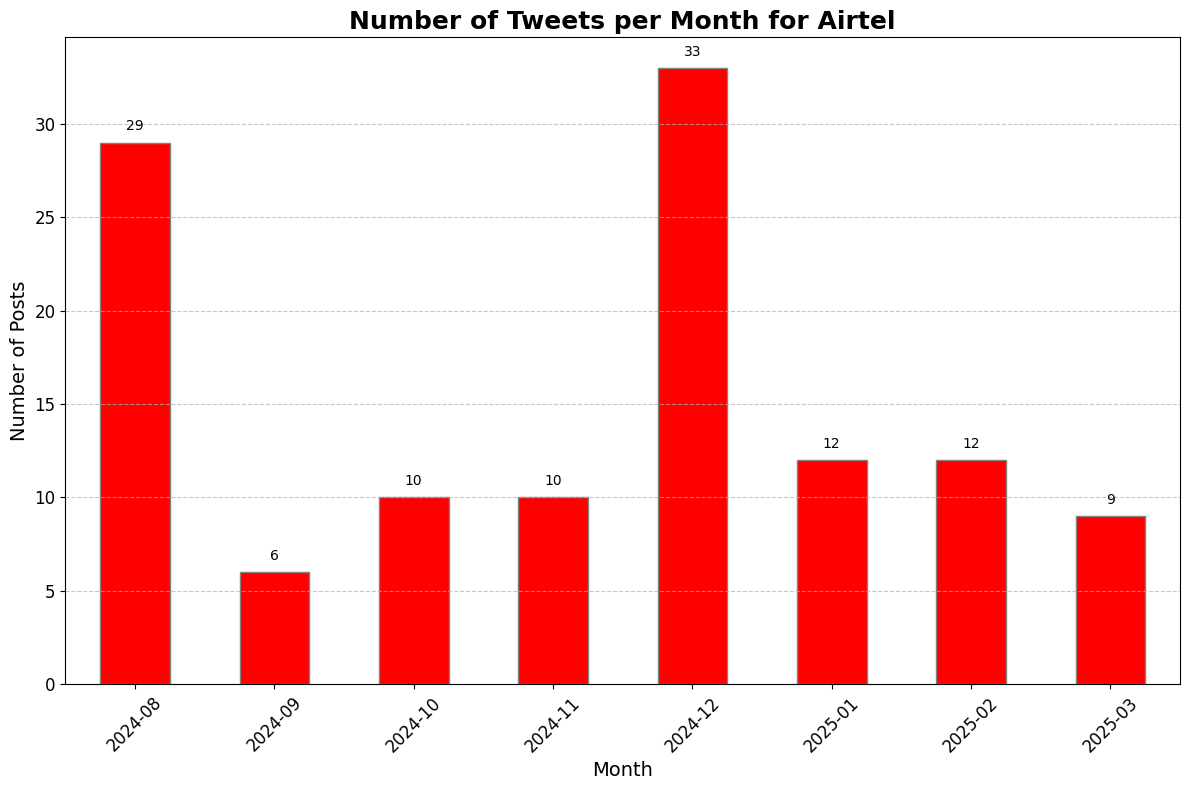

In [26]:
import seaborn as sns


# Group by month and count the number of posts
monthly_posts = filtered_df.groupby(filtered_df['createdAt'].dt.to_period('M')).size()

# Plot the results with enhanced styling
plt.figure(figsize=(12, 8))
sns.set_palette("pastel")
monthly_posts.plot(kind='bar', color='red', edgecolor='gray', legend=False)

# Adding titles and labels
plt.title('Number of Tweets per Month for Airtel', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with their heights
for idx, value in enumerate(monthly_posts):
    plt.text(idx, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

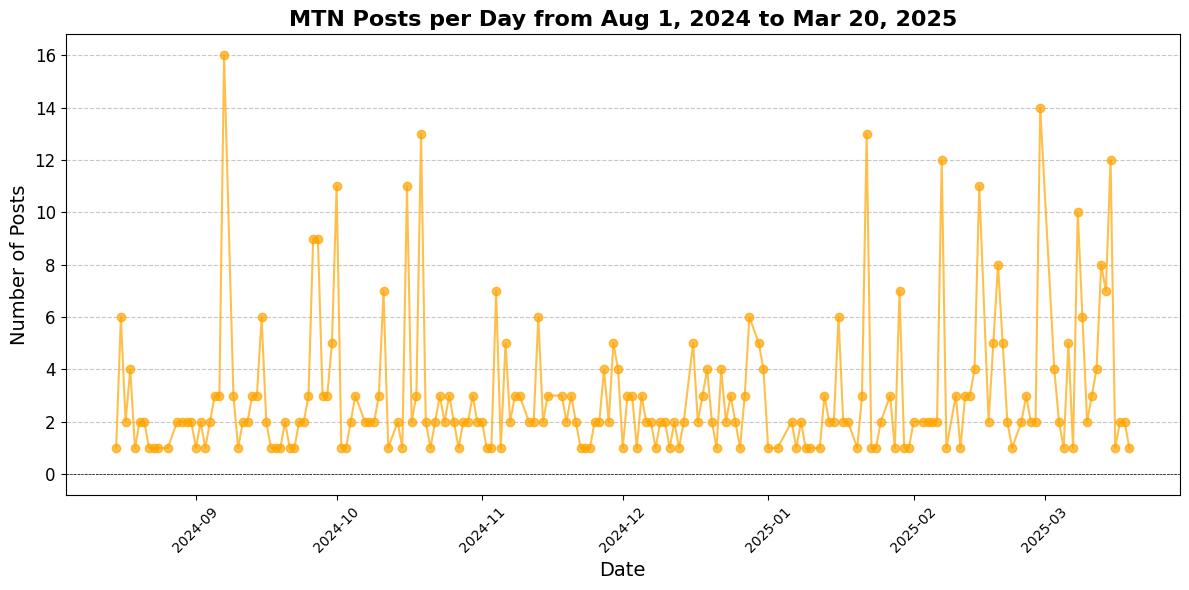

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame and it has been defined earlier

# Step 3: Group by day and count the number of posts
daily_counts = filtered_df1.groupby(filtered_df1['createdAt'].dt.date).size()

# Step 4: Prepare data for plotting
dates = daily_counts.index
counts = daily_counts.values

# Step 5: Create the plot
plt.figure(figsize=(12, 6))
plt.plot(dates, counts, marker='o', linestyle='-', color='orange', alpha=0.7)

# Step 6: Add titles and labels
plt.title('MTN Posts per Day from Aug 1, 2024 to Mar 20, 2025', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Add a horizontal line at y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Step 7: Save and show the plot
plt.savefig('airtel_day_posts.png', format='png', bbox_inches='tight')
plt.show()

In [15]:
pd.set_option('display.max_colwidth', None)

# Sort the dataframe by the 'likes' column in descending order
sorted_df = filtered_df.sort_values(by='likeCount', ascending=False)

# Get the top 5 posts
top_5_posts = sorted_df.head(5)

# Display the result
print("Top 5 posts with the highest likes:")
top_5_posts[['text', 'likeCount']]


Top 5 posts with the highest likes:


,text,likeCount
75,"It's screaming steeeeeeze!!! \n\nGet the best of unlimited data, super-fast internet, and up to 6-hour battery backup with Airtel 5G Smart Connect. \n\n#LiveLimitless \n#UnlimitedData\n#AReasonToImagine https://t.co/gPhQl7dyy4",10393
72,"Unlimited possibilities with unlimited data! \n\nStream, game, and surf like never before with our 5G SmartConnect.\n\nVisit https://t.co/ssivOcW0IC to get yours today.\n\n#Livelimitless \n#UnlimitedData\n#AReasonToImagine https://t.co/gQKY5mszVx",8627
23,"🎉🎵 Big Vibes, Bigger Celebration! 🎵🎉\n\nJoin us as we celebrate Nigeria's finest in Afro music and culture! 🇳🇬🎶 \n\nDon't miss the chance to be part of this incredible movement.\n\nRSVP now and let's make this an unforgettable experience together! \n\n#AReasonToImagine https://t.co/rnUccVBl5x",2357
4,"Say goodbye to spam messages! \nAirtel’s AI-powered Spam Alert Service keeps you safe—no apps, no setup, just pure protection. \n\nStay secure, stay ahead! \n\n#AReasonToImagine\n#AirtelSpamAlert https://t.co/yet85JOvbV",1643
14,"The Trace Awards Tour Party was epic! 🎉🎶\n\nElectrifying vibes, captivating music, and seamless connection from the Chief of Data made it unforgettable.\n\nThe best moments truly happen with the most reliable network.\n\n#AReasonToImagine\n#TraceAwardsTour\n#TraceAwards https://t.co/KQ4tCymLA8",1378


In [16]:
# Sort the dataframe by the 'likes' column in descending order
sorted_df = filtered_df.sort_values(by='replyCount', ascending=False)

# Get the top 5 posts
top_5_posts = sorted_df.head(5)

# Display the result
print("Top 5 posts with the highest likes:")
top_5_posts[['text', 'replyCount']]


Top 5 posts with the highest likes:


,text,replyCount
75,"It's screaming steeeeeeze!!! \n\nGet the best of unlimited data, super-fast internet, and up to 6-hour battery backup with Airtel 5G Smart Connect. \n\n#LiveLimitless \n#UnlimitedData\n#AReasonToImagine https://t.co/gPhQl7dyy4",786
15,"🏃‍♂️🔥 The race is on, and the energy is unstoppable!\n\nWhether you're running, cheering, or streaming, the Chief of Data got you covered—share every moment!\n\nTag \n@airtelnigeria\n and let’s make every mile count! 🏅💨\n\n#AReasonToImagine #Miles2Memories #LagosCityMarathon https://t.co/47FseC2xkn",666
14,"The Trace Awards Tour Party was epic! 🎉🎶\n\nElectrifying vibes, captivating music, and seamless connection from the Chief of Data made it unforgettable.\n\nThe best moments truly happen with the most reliable network.\n\n#AReasonToImagine\n#TraceAwardsTour\n#TraceAwards https://t.co/KQ4tCymLA8",519
93,Can you arrange the words correctly? \n\nLeave a comment below. ❤\n\n#AReasonToImagine https://t.co/dCRm4cIGDh,493
72,"Unlimited possibilities with unlimited data! \n\nStream, game, and surf like never before with our 5G SmartConnect.\n\nVisit https://t.co/ssivOcW0IC to get yours today.\n\n#Livelimitless \n#UnlimitedData\n#AReasonToImagine https://t.co/gQKY5mszVx",368
